# Importación de paquetes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from pprint import pprint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import AllKNN
from sklearn.tree import DecisionTreeClassifier
# Funciones útiles
from utils import (get_data_sets, prepare_data, get_report, get_optimal_values_KNN,
                   get_optimal_values_Random_Forest, get_optimal_values_decision_tree,
                   get_optimal_values_ComplementNB, get_optimal_values_SVC)

In [2]:
# Leer los datos
data = pd.read_csv('online_shoppers_intention.csv')

## Conociendo los datos

El dataset utilizado es extraído de: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

Descripción de los atributos según la página de origen:

The dataset consists of 10 numerical and 8 categorical attributes. 
The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.



In [3]:
# Forma de los datos (Filas, Columnas)
data.shape

(12330, 18)

In [4]:
# Desripción de los datos
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
# Descripción de los datos 2.0
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [6]:
# Columnas categóricas
categorical_vars = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Month', 'Revenue']

for column in categorical_vars:
    print(column, data[column].unique())
    print(column, data[column].describe())

OperatingSystems [1 2 4 3 7 6 8 5]
OperatingSystems count    12330.000000
mean         2.124006
std          0.911325
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: OperatingSystems, dtype: float64
Browser [ 1  2  3  4  5  6  7 10  8  9 12 13 11]
Browser count    12330.000000
mean         2.357097
std          1.717277
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         13.000000
Name: Browser, dtype: float64
Region [1 9 2 3 4 5 6 7 8]
Region count    12330.000000
mean         3.147364
std          2.401591
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          9.000000
Name: Region, dtype: float64
TrafficType [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20]
TrafficType count    12330.000000
mean         4.069586
std          4.025169
min          1.000000
25%          2.000000
50%          2.000000
75%          

In [7]:
for column in data.columns:
    print(column, data[column].describe())

Administrative count    12330.000000
mean         2.315166
std          3.321784
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         27.000000
Name: Administrative, dtype: float64
Administrative_Duration count    12330.000000
mean        80.818611
std        176.779107
min          0.000000
25%          0.000000
50%          7.500000
75%         93.256250
max       3398.750000
Name: Administrative_Duration, dtype: float64
Informational count    12330.000000
mean         0.503569
std          1.270156
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         24.000000
Name: Informational, dtype: float64
Informational_Duration count    12330.000000
mean        34.472398
std        140.749294
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2549.375000
Name: Informational_Duration, dtype: float64
ProductRelated count    12330.000000
mean        31.7314

In [8]:
# Verificamos si hay valores nulos en cada columna
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [9]:
# Matriz de correlación entre variables:
data.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


In [10]:
for column in data.columns:
    print(f'Valores únicos de la columna {column}: {len(data[column].unique())}')

Valores únicos de la columna Administrative: 27
Valores únicos de la columna Administrative_Duration: 3335
Valores únicos de la columna Informational: 17
Valores únicos de la columna Informational_Duration: 1258
Valores únicos de la columna ProductRelated: 311
Valores únicos de la columna ProductRelated_Duration: 9551
Valores únicos de la columna BounceRates: 1872
Valores únicos de la columna ExitRates: 4777
Valores únicos de la columna PageValues: 2704
Valores únicos de la columna SpecialDay: 6
Valores únicos de la columna Month: 10
Valores únicos de la columna OperatingSystems: 8
Valores únicos de la columna Browser: 13
Valores únicos de la columna Region: 9
Valores únicos de la columna TrafficType: 20
Valores únicos de la columna VisitorType: 3
Valores únicos de la columna Weekend: 2
Valores únicos de la columna Revenue: 2


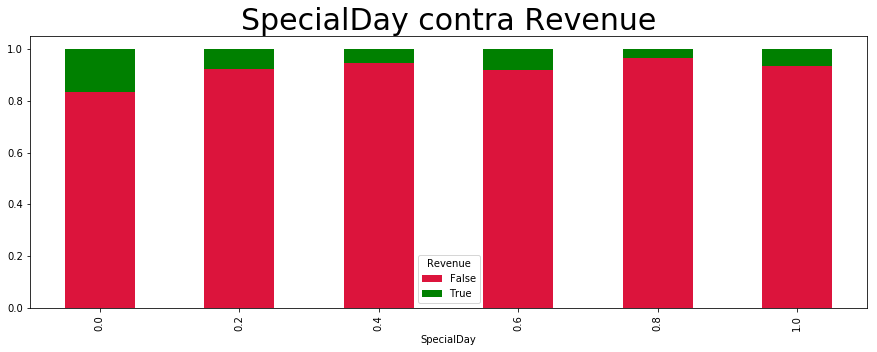

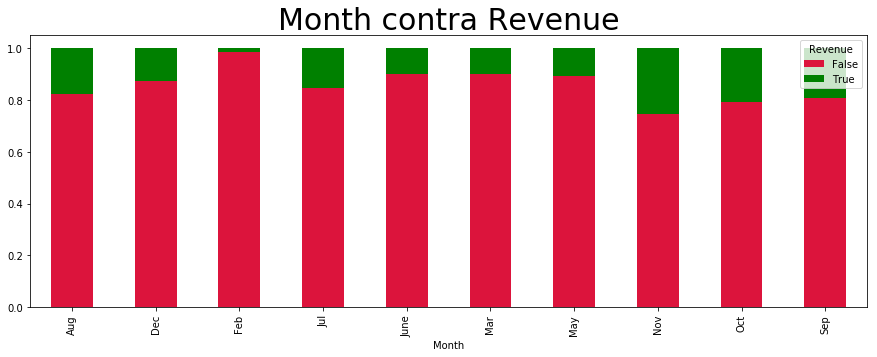

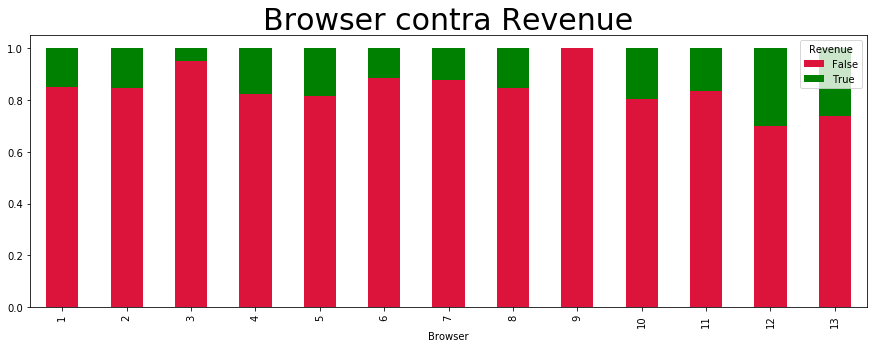

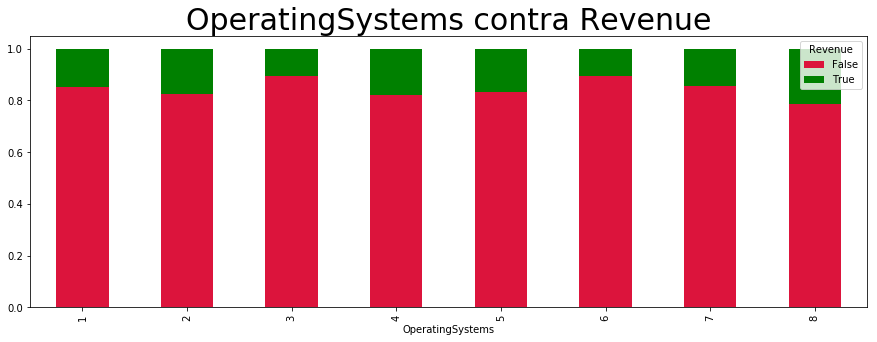

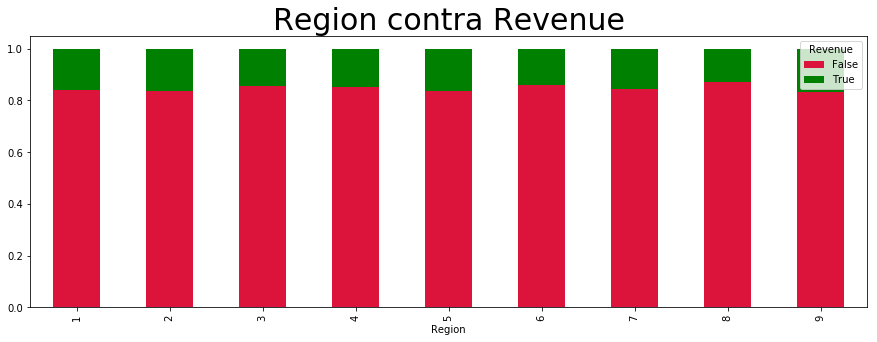

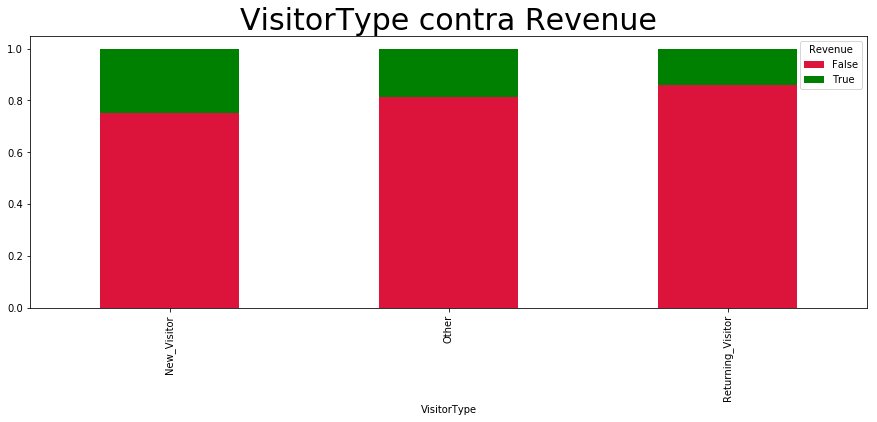

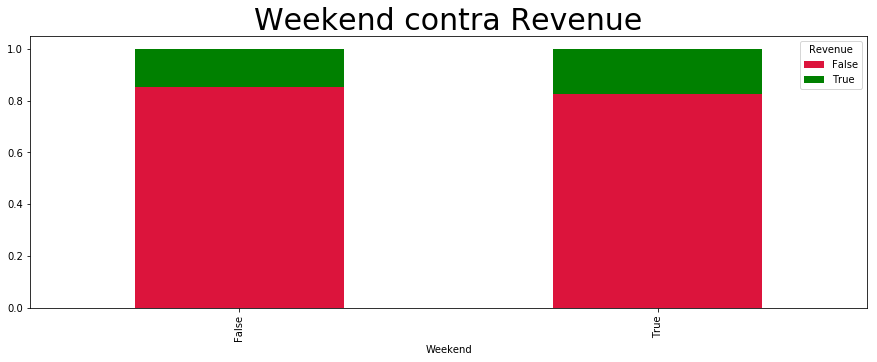

In [18]:
# Graficos de algunas columnas vs la clase "Revenue"
columns = ['SpecialDay', 'Month', 'Browser', 'OperatingSystems', 'Region', 'VisitorType', 'Weekend']
for column in columns:
    df = pd.crosstab(data[column], data['Revenue'])
    df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['crimson', 'green'])
    plt.title(f'{column} contra Revenue', fontsize = 30)
    plt.savefig(f'{column}.png', bbox_inches='tight')
    plt.show()
    

## Transformando los datos

In [3]:
# Tranformar boolean a Integer (Falso = 0, Verdadero = 1)
le = LabelEncoder()
revenue = le.fit_transform(data['Revenue'])

# Separar en datos y clases
x = pd.get_dummies(data)
x = x.drop(['Revenue'], axis = 1)
y = revenue

print(f'Forma de x: {x.shape}')
print(f'Forma de y: {y.shape}')

Forma de x: (12330, 28)
Forma de y: (12330,)


In [4]:
from sklearn.model_selection import train_test_split

x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size = 0.15, random_state = 0)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = 0.15, random_state = 0)


# Data de entrenamiento
print(f'Forma de x_train : {x_train.shape}')
print(f'Forma de y_train : {y_train.shape}')

#Data de validación
print(f'Forma de x_test : {x_val.shape}')
print(f'Forma de y_test : {y_val.shape}')

#Data de prueba
print(f'Forma de x_test : {x_test.shape}')
print(f'Forma de y_test : {y_test.shape}')

Forma de x_train : (8908, 28)
Forma de y_train : (8908,)
Forma de x_test : (1572, 28)
Forma de y_test : (1572,)
Forma de x_test : (1850, 28)
Forma de y_test : (1850,)


In [5]:
# Identificar que características son más relevantes

model = ExtraTreesClassifier()
model.fit(x, y)

features_list = []
for n,l in zip(list(x.columns), model.feature_importances_):
    features_list.append([n,l])
features_list = sorted(features_list, key=lambda k: k[1])
pprint(features_list)

[['VisitorType_Other', 0.0003895654319241606],
 ['Month_Feb', 0.0006580623461655119],
 ['Month_June', 0.0021593650525896907],
 ['Month_Aug', 0.0030575112310357623],
 ['Month_Sep', 0.0035694008917349445],
 ['Month_Jul', 0.003880907635823673],
 ['Month_Dec', 0.004002560896755256],
 ['Month_Oct', 0.004377290550582208],
 ['SpecialDay', 0.004677007993983409],
 ['Month_Mar', 0.005165718590058635],
 ['Month_May', 0.005850318076685383],
 ['VisitorType_Returning_Visitor', 0.0059697148835544],
 ['VisitorType_New_Visitor', 0.006474480691752567],
 ['Weekend', 0.01640503012206957],
 ['Month_Nov', 0.021472958794644233],
 ['Informational_Duration', 0.0289834725647942],
 ['OperatingSystems', 0.030754116087093053],
 ['Browser', 0.031796315988741226],
 ['Informational', 0.03219164098498077],
 ['Region', 0.04460096141801883],
 ['TrafficType', 0.045340328098196714],
 ['Administrative_Duration', 0.04972967586486391],
 ['BounceRates', 0.054146019057491654],
 ['Administrative', 0.05453987488472891],
 ['Produ

/Users/Carlo.Alva/Desktop/Proyectos/Aprendizaje automático/env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [13]:
columns = ['Returning_Visitor','New_Visitor','Other']
for col in columns:
    total = len(data.loc[(data['VisitorType'] == col)])
    print(f'Total para {col}: {total}')
    print(f'Porcentaje de compra realizada en {col}: ', 100*len(data.loc[(data['VisitorType'] == col) & (data['Revenue'] == True)])/total)
    print(f'Compras realizadas en {col}: ', len(data.loc[(data['VisitorType'] == col) & (data['Revenue'] == True)]))
    print(f'Porcentaje de compra no realizada en {col}: ', 100*len(data.loc[(data['VisitorType'] == col) & (data['Revenue'] == False)])/total)
    print('===================')

Total para Returning_Visitor: 10551
Porcentaje de compra realizada en Returning_Visitor:  13.93232868922377
Compras realizadas en Returning_Visitor:  1470
Porcentaje de compra no realizada en Returning_Visitor:  86.06767131077623
Total para New_Visitor: 1694
Porcentaje de compra realizada en New_Visitor:  24.911452184179456
Compras realizadas en New_Visitor:  422
Porcentaje de compra no realizada en New_Visitor:  75.08854781582055
Total para Other: 85
Porcentaje de compra realizada en Other:  18.823529411764707
Compras realizadas en Other:  16
Porcentaje de compra no realizada en Other:  81.17647058823529


In [14]:
columns = data['Month'].unique()
total_compras = len(data.loc[(data['Revenue'] == True)])
for col in columns:
    total = len(data.loc[(data['Month'] == col)])
    print(f'Total por mes {col}: {total}')
    num_compras = len(data.loc[(data['Month'] == col) & (data['Revenue'] == True)])
    print(f'Porcentaje de compras en total: {100*num_compras/total_compras}')
    print(f'Número de compras: {num_compras}')
    print(f'Porcentaje: {100*num_compras/total} %')
    num_no_compras = len(data.loc[(data['Month'] == col) & (data['Revenue'] == False)])
    print(f'Número de no compras: {num_no_compras}')
    print(f'Porcentaje: {100*num_no_compras/total} %')
    print('==================')

Total por mes Feb: 184
Porcentaje de compras en total: 0.15723270440251572
Número de compras: 3
Porcentaje: 1.6304347826086956 %
Número de no compras: 181
Porcentaje: 98.3695652173913 %
Total por mes Mar: 1907
Porcentaje de compras en total: 10.062893081761006
Número de compras: 192
Porcentaje: 10.068169900367069 %
Número de no compras: 1715
Porcentaje: 89.93183009963293 %
Total por mes May: 3364
Porcentaje de compras en total: 19.129979035639412
Número de compras: 365
Porcentaje: 10.850178359096313 %
Número de no compras: 2999
Porcentaje: 89.14982164090368 %
Total por mes Oct: 549
Porcentaje de compras en total: 6.027253668763103
Número de compras: 115
Porcentaje: 20.947176684881605 %
Número de no compras: 434
Porcentaje: 79.0528233151184 %
Total por mes June: 288
Porcentaje de compras en total: 1.519916142557652
Número de compras: 29
Porcentaje: 10.069444444444445 %
Número de no compras: 259
Porcentaje: 89.93055555555556 %
Total por mes Jul: 432
Porcentaje de compras en total: 3.4591

## Utilizando KNN

Ya se ha realizado la transformación de los datos
Se utilizará el Algoritmo k-Nearest Neighbor para intentar obtener la mejor exactitud al clasificar

In [6]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
# Valor inicial sin modificación de datos ni ajuste de parámetros
print(accuracy_score(y_test,y_pred)*100)

85.45945945945947


In [7]:
neighbors = [x for x in range(1,50) if x % 2 != 0]
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append((k, scores.mean()))
pprint(cv_scores)

[(1, 0.8352025876744978),
 (3, 0.8597872608734033),
 (5, 0.8652883390711106),
 (7, 0.8657396688482832),
 (9, 0.8640552844298164),
 (11, 0.8643917325565266),
 (13, 0.8647280545782419),
 (15, 0.8645029571621332),
 (17, 0.8646153167126949),
 (19, 0.8638296825937275),
 (21, 0.862033695254669),
 (23, 0.861584509262412),
 (25, 0.8614722758168452),
 (27, 0.8609111085890113),
 (29, 0.8604623009117391),
 (31, 0.8596765406877767),
 (33, 0.8586661874676856),
 (35, 0.8581047680298617),
 (37, 0.8574311151464709),
 (39, 0.8570945409147657),
 (41, 0.8561966733502315),
 (43, 0.8557476134629693),
 (45, 0.8551863201301403),
 (47, 0.8550742127895686),
 (49, 0.8546252790073015)]


## Entrenamiento con train y validation set
Ahora se prueba entrenar el modelo con los ajustes de óptimos y se hace la prueba con el conjunto de test

In [8]:
max_score, optimal_k, optimal_p, optimal_weight = get_optimal_values_KNN(x_train, y_train, x_val, y_val)

optimal_knn = KNeighborsClassifier(n_neighbors=optimal_k, p=optimal_p, weights=optimal_weight, n_jobs=-1)
optimal_knn.fit(x_train_val, y_train_val)
y_pred = optimal_knn.predict(x_test)
max_score = accuracy_score(y_test, y_pred)*100
print(f'Exactitud: {max_score}')

87.53180661577609 19 3 uniform
Exactitud: 85.89189189189189


Podemos ver que aunque se obtuvo un mejor desempeño con el set de entrenamiento, la exactitud no sufrió un gran cambio al realizar la predicción con el set de pruebas. Sin embargo se probará utilizar una técnica para el manejo de datos desbalanceados e intentar obtener mejores resultados

In [3]:
def get_report(y_test, y_pred):
    confu_matrix = confusion_matrix(y_test, y_pred)
    TN = confu_matrix[0,0]
    FN = confu_matrix[1,0]
    FP = confu_matrix[0,1]
    TP = confu_matrix[1,1]

    print ('              +-----------------+')
    print ('              |   Predicción    |')
    print ('              +-----------------+')
    print ('              |    +   |    -   |')
    print ('+-------+-----+--------+--------+')
    print ('| Valor |  +  |  {:5d} |  {:5d} |'.format(TP, FN) )
    print ('| real  +-----+--------+--------+')
    print ('|       |  -  |  {:5d} |  {:5d} |'.format(FP, TN) )
    print ('+-------+-----+--------+--------+')
    print()

    print(classification_report(y_test, y_pred))

In [9]:
get_report(y_test, y_pred)

              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |     59 |    249 |
| real  +-----+--------+--------+
|       |  -  |     12 |   1530 |
+-------+-----+--------+--------+

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1542
           1       0.83      0.19      0.31       308

   micro avg       0.86      0.86      0.86      1850
   macro avg       0.85      0.59      0.62      1850
weighted avg       0.86      0.86      0.82      1850



In [12]:
# Over sampling
df_minority_upsampled = resample(data, replace=True, n_samples=10422, random_state=12)
df_os_train = pd.concat([data, df_minority_upsampled])

# Cuenta de clases
print('Número de clases')
print('Datos:')
print(data['Revenue'].value_counts())
print('Nuevos datos:')
print(df_os_train['Revenue'].value_counts())

x_os, y_os = prepare_data(df_os_train)

x_os_train_val, y_os_train_val, x_os_test, y_os_test, x_os_train, y_os_train, x_os_val, y_os_val = get_data_sets(x_os, y_os)

# Hallar los valores optimos del clasificador
max_score, optimal_k, optimal_p, optimal_weight = get_optimal_values_KNN(x_os_train, y_os_train, x_os_val, y_os_val)

optimal_os_knn = KNeighborsClassifier(n_neighbors=optimal_k, p=optimal_p, weights=optimal_weight, n_jobs=-1)
optimal_os_knn.fit(x_os_train_val, y_os_train_val)
y_pred = optimal_os_knn.predict(x_os_test)
max_score_os_knn = accuracy_score(y_os_test, y_pred)*100
print(f'Exactitud: {max_score_os_knn}')

get_report(y_os_test, y_pred)


Número de clases
Datos:
False    10422
True      1908
Name: Revenue, dtype: int64
Nuevos datos:
False    19274
True      3478
Name: Revenue, dtype: int64
Forma de x: (22752, 28)
Forma de y: (22752,)
Forma de x_train : (16438, 28)
Forma de y_train : (16438,)
Forma de x_test : (2901, 28)
Forma de y_test : (2901,)
Forma de x_test : (3413, 28)
Forma de y_test : (3413,)
95.48431575318855 29 3 distance
Exactitud: 95.9566363902725
              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |    372 |    119 |
| real  +-----+--------+--------+
|       |  -  |     19 |   2903 |
+-------+-----+--------+--------+

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2922
           1       0.95      0.76      0.84       491

   micro avg       0.96      0.96      0.96      3413
   macro avg       0.96      0.88      0.91    

In [93]:
# Under sampling
df_majority_downsample = resample(data, replace=True, n_samples=1200, random_state=12)

df_us_train = pd.concat([df_majority_downsample, df_minority_upsampled])

print('Número de clases')
print('Datos:')
print(data['Revenue'].value_counts())
print('Nuevos datos:')
print(df_us_train['Revenue'].value_counts())

x_us, y_us = prepare_data(df_us_train)

x_us_train_val, x_us_test, y_us_train_val, y_us_test = train_test_split(x_us, y_us, test_size = 0.15, random_state = 0)
x_us_train, x_us_val, y_us_train, y_us_val = train_test_split(x_us_train_val, y_us_train_val, test_size = 0.15, random_state = 0)


# Data de entrenamiento
print(f'Forma de x_train : {x_us_train.shape}')
print(f'Forma de y_train : {y_us_train.shape}')

#Data de validación
print(f'Forma de x_test : {x_us_val.shape}')
print(f'Forma de y_test : {y_us_val.shape}')

#Data de prueba
print(f'Forma de x_test : {x_us_test.shape}')
print(f'Forma de y_test : {y_us_test.shape}')

max_score, optimal_k, optimal_p, optimal_weight = get_optimal_values_KNN(x_us_train, y_us_train, x_us_val, y_us_val)

optimal_us_knn = KNeighborsClassifier(n_neighbors=optimal_k, p=optimal_p, weights=optimal_weight, n_jobs=-1)
optimal_us_knn.fit(x_us_train_val, y_us_train_val)
y_pred = optimal_us_knn.predict(x_us_test)
max_score_us_knn = accuracy_score(y_us_test, y_pred)*100
print(f'Exactitud: {max_score_us_knn}')

get_report(y_us_test, y_pred)


False    9876
True     1746
Name: Revenue, dtype: int64
Forma de x: (11622, 28)
Forma de y: (11622,)
Forma de x_train : (8396, 28)
Forma de y_train : (8396,)
Forma de x_test : (1482, 28)
Forma de y_test : (1482,)
Forma de x_test : (1744, 28)
Forma de y_test : (1744,)
93.92712550607287 47 3 distance
95.35550458715596
              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |    139 |     78 |
| real  +-----+--------+--------+
|       |  -  |      3 |   1524 |
+-------+-----+--------+--------+

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1527
           1       0.98      0.64      0.77       217

   micro avg       0.95      0.95      0.95      1744
   macro avg       0.97      0.82      0.87      1744
weighted avg       0.95      0.95      0.95      1744



In [94]:
#Over-sampling con SMOTE

sm = SMOTE(random_state=12)
x_smote_res, y_smote_res = sm.fit_sample(x, y)

x_smote_train_val, x_smote_test, y_smote_train_val, y_smote_test = train_test_split(x_smote_res, y_smote_res, test_size = 0.15, random_state = 0)
x_smote_train, x_smote_val, y_smote_train, y_smote_val = train_test_split(x_smote_train_val, y_smote_train_val, test_size = 0.15, random_state = 0)

max_score, optimal_k, optimal_p, optimal_weight = get_optimal_values_KNN(x_smote_train, y_smote_train, x_smote_val, y_smote_val)

optimal_smote_knn = KNeighborsClassifier(n_neighbors=optimal_k, p=optimal_p, weights=optimal_weight, n_jobs=-1)
optimal_smote_knn.fit(x_smote_train_val, y_smote_train_val)
y_pred = optimal_smote_knn.predict(x_smote_test)
max_score_smote = accuracy_score(y_smote_test, y_pred)*100
print(f'Exactitud: {max_score_smote}')

get_report(y_smote_test, y_pred)

17760
92.07957957957959 1 1 uniform
92.06907579149345
              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |   1535 |     42 |
| real  +-----+--------+--------+
|       |  -  |    206 |   1344 |
+-------+-----+--------+--------+

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1550
           1       0.88      0.97      0.93      1577

   micro avg       0.92      0.92      0.92      3127
   macro avg       0.93      0.92      0.92      3127
weighted avg       0.93      0.92      0.92      3127



## Utilizando Random Forest
Se utilizará el Algoritmo random Forest para intentar obtener la mejor exactitud al clasificar

In [4]:
def prepare_data(dataset):
    # Tranformar boolean a Integer (Falso = 0, Verdadero = 1)
    le = LabelEncoder()
    revenue = le.fit_transform(dataset['Revenue'])

    # Separar en datos y clases
    x = pd.get_dummies(dataset)
    x = x.drop(['Revenue'], axis = 1)
    y = revenue

    print(f'Forma de x: {x.shape}')
    print(f'Forma de y: {y.shape}')
    return x, y

In [5]:
def get_data_sets(x, y):
    x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size = 0.15, random_state = 0)
    x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = 0.15, random_state = 0)
    # Data de entrenamiento
    print(f'Forma de x_train : {x_train.shape}')
    print(f'Forma de y_train : {y_train.shape}')
    #Data de validación
    print(f'Forma de x_test : {x_val.shape}')
    print(f'Forma de y_test : {y_val.shape}')
    #Data de prueba
    print(f'Forma de x_test : {x_test.shape}')
    print(f'Forma de y_test : {y_test.shape}')
    return x_train_val, y_train_val, x_test, y_test, x_train, y_train, x_val, y_val

In [18]:
x, y = prepare_data(data)

x_train_val, y_train_val, x_test, y_test, x_train, y_train, x_val, y_val = get_data_sets(x, y)

random_forest = RandomForestClassifier(n_jobs=-1)
random_forest.fit(x_train, y_train)

y_pred = random_forest.predict(x_test)

print(f'Exactitud: {accuracy_score(y_test,y_pred)*100} %')

get_report(y_test, y_pred)

Forma de x: (12330, 28)
Forma de y: (12330,)
Forma de x_train : (8908, 28)
Forma de y_train : (8908,)
Forma de x_test : (1572, 28)
Forma de y_test : (1572,)
Forma de x_test : (1850, 28)
Forma de y_test : (1850,)


/Users/Carlo.Alva/Desktop/Proyectos/Aprendizaje automático/env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


88.64864864864866
              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |    140 |    168 |
| real  +-----+--------+--------+
|       |  -  |     42 |   1500 |
+-------+-----+--------+--------+

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1542
           1       0.77      0.45      0.57       308

   micro avg       0.89      0.89      0.89      1850
   macro avg       0.83      0.71      0.75      1850
weighted avg       0.88      0.89      0.87      1850



## Ajuste de parámetros

In [60]:
def get_optimal_values_Random_Forest(x_train, y_train, x_val, y_val):
    n_estimators = [x for x in range(0,160,5) if x]
    criterions = ['gini', 'entropy']
    max_features = [5, 'sqrt', 'log2', None]
    max_score = 0
    warm_starts = [True, False]
    optimal_n_estimator = 1
    optiomal_criteria = 'gini'
    optiomal_m_feature = 1
    optimal_warm_start = False

    # Evaluamos para escoger el mejor parámetro
    for k in n_estimators:
        for c in criterions:
            for m_feature in max_features:
                for warm_start in warm_starts:
                    random_forest = RandomForestClassifier(n_estimators=k, criterion=c, max_features=m_feature, warm_start=warm_start, random_state=0, n_jobs=-1)
                    random_forest.fit(x_train, y_train)
                    y_pred = random_forest.predict(x_val)
                    if max_score < accuracy_score(y_val, y_pred)*100:
                        optimal_n_estimator = k
                        optiomal_criteria = c
                        optiomal_m_feature = m_feature
                        optimal_warm_start = warm_start
                        max_score = accuracy_score(y_val,y_pred)*100
    print(max_score, optimal_n_estimator, optiomal_criteria, optiomal_m_feature, optimal_warm_start)
    return max_score, optimal_n_estimator, optiomal_criteria, optiomal_m_feature, optimal_warm_start


In [61]:
x, y = prepare_data(data)

x_train_val, y_train_val, x_test, y_test, x_train, y_train, x_val, y_val = get_data_sets(x, y)

max_score, optimal_n_estimator, optiomal_criteria, optiomal_m_feature, optimal_warm_start = get_optimal_values_Random_Forest(x_train, y_train, x_val, y_val)

optimal_random_forest = RandomForestClassifier(n_estimators=optimal_n_estimator, criterion=optiomal_criteria, max_features=optiomal_m_feature, warm_start=optimal_warm_start, random_state=0, n_jobs=-1)
optimal_random_forest.fit(x_train_val, y_train_val)
y_pred = optimal_random_forest.predict(x_test)

max_score_optimal_rf = accuracy_score(y_test, y_pred)*100
print(f'Exactitud: {max_score_optimal_rf}')

get_report(y_test, y_pred)


Forma de x: (12330, 28)
Forma de y: (12330,)
Forma de x_train : (8908, 28)
Forma de y_train : (8908,)
Forma de x_test : (1572, 28)
Forma de y_test : (1572,)
Forma de x_test : (1850, 28)
Forma de y_test : (1850,)
91.66666666666666 65 entropy log2 True
Presición: 91.66666666666666
              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |    172 |    136 |
| real  +-----+--------+--------+
|       |  -  |     57 |   1485 |
+-------+-----+--------+--------+

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1542
           1       0.75      0.56      0.64       308

   micro avg       0.90      0.90      0.90      1850
   macro avg       0.83      0.76      0.79      1850
weighted avg       0.89      0.90      0.89      1850



### Manejando el balance de datos

In [62]:
#Over-sampling con SMOTE

x, y = prepare_data(data)
sm = SMOTE(random_state=12)
x_smote_res, y_smote_res = sm.fit_sample(x, y)

x_train_val, y_train_val, x_test, y_test, x_train, y_train, x_val, y_val = get_data_sets(x_smote_res, y_smote_res)

optimal_random_forest = RandomForestClassifier(n_estimators=optimal_n_estimator, criterion=optiomal_criteria, max_features=optiomal_m_feature, warm_start=optimal_warm_start, random_state=0 , n_jobs=-1)
optimal_random_forest.fit(x_train_val, y_train_val)
y_pred = optimal_random_forest.predict(x_test)

print(f'Exactitud: {accuracy_score(y_test, y_pred)*100}')

get_report(y_test, y_pred)



Forma de x: (12330, 28)
Forma de y: (12330,)
Forma de x_train : (15059, 28)
Forma de y_train : (15059,)
Forma de x_test : (2658, 28)
Forma de y_test : (2658,)
Forma de x_test : (3127, 28)
Forma de y_test : (3127,)
Presición: 94.62743843939879
              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |   1506 |     71 |
| real  +-----+--------+--------+
|       |  -  |     97 |   1453 |
+-------+-----+--------+--------+

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1550
           1       0.94      0.95      0.95      1577

   micro avg       0.95      0.95      0.95      3127
   macro avg       0.95      0.95      0.95      3127
weighted avg       0.95      0.95      0.95      3127



In [63]:
#Under-sampling con AllKNN

x, y = prepare_data(data)
allknn = AllKNN()
x_allknn_res, y_allknn_res = allknn.fit_resample(x, y)

x_train_val, y_train_val, x_test, y_test, x_train, y_train, x_val, y_val = get_data_sets(x_allknn_res, y_allknn_res)

optimal_random_forest = RandomForestClassifier(n_estimators=optimal_n_estimator, criterion=optiomal_criteria, max_features=optiomal_m_feature, warm_start=optimal_warm_start, random_state=0 , n_jobs=-1)
optimal_random_forest.fit(x_train_val, y_train_val)
y_pred = optimal_random_forest.predict(x_test)
max_score_rf_us = accuracy_score(y_test, y_pred)*100
print(f'Exactitud: {max_score_rf_us} %')

get_report(y_test, y_pred)

Forma de x: (12330, 28)
Forma de y: (12330,)
Forma de x_train : (6920, 28)
Forma de y_train : (6920,)
Forma de x_test : (1222, 28)
Forma de y_test : (1222,)
Forma de x_test : (1437, 28)
Forma de y_test : (1437,)
Presición: 93.1106471816284
              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |    237 |     64 |
| real  +-----+--------+--------+
|       |  -  |     35 |   1101 |
+-------+-----+--------+--------+

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1136
           1       0.87      0.79      0.83       301

   micro avg       0.93      0.93      0.93      1437
   macro avg       0.91      0.88      0.89      1437
weighted avg       0.93      0.93      0.93      1437



## Utilizando Decision Tree
Se utilizará el Algoritmo decision tree para intentar obtener la mejor exactitud al clasificar

In [9]:
x, y = prepare_data(data)

x_train_val, y_train_val, x_test, y_test, x_train, y_train, x_val, y_val = get_data_sets(x, y)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

y_pred = decision_tree.predict(x_test)

max_score_dt = accuracy_score(y_test,y_pred)*100
print(f'Exactitud: {max_score_dt} %')

get_report(y_test, y_pred)


Forma de x: (12330, 28)
Forma de y: (12330,)
Forma de x_train : (8908, 28)
Forma de y_train : (8908,)
Forma de x_test : (1572, 28)
Forma de y_test : (1572,)
Forma de x_test : (1850, 28)
Forma de y_test : (1850,)
Presición: 85.89189189189189 %
              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |    174 |    134 |
| real  +-----+--------+--------+
|       |  -  |    127 |   1415 |
+-------+-----+--------+--------+

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1542
           1       0.58      0.56      0.57       308

   micro avg       0.86      0.86      0.86      1850
   macro avg       0.75      0.74      0.74      1850
weighted avg       0.86      0.86      0.86      1850



In [12]:
def get_optimal_values_decision_tree(x_train, y_train, x_val, y_val):
    criterions = ['gini', 'entropy']
    splitters = ['best', 'random']
    max_features = [5, 'sqrt', 'log2', None]
    class_weights = ['balanced' , None]
    max_score = 0
    optimal_splitter = 'best'
    optiomal_criteria = 'gini'
    optiomal_m_feature = 1
    optimal_class_weight = None

    # Evaluamos para escoger el mejor parámetro
    for k in splitters:
        for c in criterions:
            for m_feature in max_features:
                for class_w in class_weights:
                    decesion_tree = DecisionTreeClassifier(splitter=k, criterion=c, max_features=m_feature, class_weight=class_w, random_state=0)
                    decesion_tree.fit(x_train, y_train)
                    y_pred = decesion_tree.predict(x_val)
                    if max_score < accuracy_score(y_val, y_pred)*100:
                        optimal_splitter = k
                        optiomal_criteria = c
                        optiomal_m_feature = m_feature
                        optimal_class_weight = class_w
                        max_score = accuracy_score(y_val,y_pred)*100
    print(max_score, optimal_splitter, optiomal_criteria, optiomal_m_feature, optimal_class_weight)
    return max_score, optimal_splitter, optiomal_criteria, optiomal_m_feature, optimal_class_weight


In [13]:
x, y = prepare_data(data)

x_train_val, y_train_val, x_test, y_test, x_train, y_train, x_val, y_val = get_data_sets(x, y)

max_score, optimal_splitter, optiomal_criteria, optiomal_m_feature, optimal_class_weight = get_optimal_values_decision_tree(x_train, y_train, x_val, y_val)

optimal_decision_tree = DecisionTreeClassifier(splitter=optimal_splitter, criterion=optiomal_criteria, max_features=optiomal_m_feature, class_weight=optimal_class_weight, random_state=0)
optimal_decision_tree.fit(x_train_val, y_train_val)
y_pred = optimal_decision_tree.predict(x_test)

max_score_optimal_dt = accuracy_score(y_test, y_pred)*100
print(f'Exactitud: {max_score_optimal_dt} %')

get_report(y_test, y_pred)


Forma de x: (12330, 28)
Forma de y: (12330,)
Forma de x_train : (8908, 28)
Forma de y_train : (8908,)
Forma de x_test : (1572, 28)
Forma de y_test : (1572,)
Forma de x_test : (1850, 28)
Forma de y_test : (1850,)
87.59541984732824 best entropy None None
Presición: 87.59541984732824
              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |    167 |    141 |
| real  +-----+--------+--------+
|       |  -  |    123 |   1419 |
+-------+-----+--------+--------+

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1542
           1       0.58      0.54      0.56       308

   micro avg       0.86      0.86      0.86      1850
   macro avg       0.74      0.73      0.74      1850
weighted avg       0.85      0.86      0.86      1850



### Manejando el balance de datos 

In [14]:
#Over-sampling con SMOTE
x, y = prepare_data(data)
sm = SMOTE(random_state=12)
x_smote_res, y_smote_res = sm.fit_sample(x, y)

x_train_val, y_train_val, x_test, y_test, x_train, y_train, x_val, y_val = get_data_sets(x_smote_res, y_smote_res)

max_score, optimal_splitter, optiomal_criteria, optiomal_m_feature, optimal_class_weight = get_optimal_values_decision_tree(x_train, y_train, x_val, y_val)

optimal_decision_tree = DecisionTreeClassifier(splitter=optimal_splitter, criterion=optiomal_criteria, max_features=optiomal_m_feature, class_weight=optimal_class_weight, random_state=0)
optimal_decision_tree.fit(x_train_val, y_train_val)
y_pred = optimal_decision_tree.predict(x_test)

max_score_optimal_smote_dt = accuracy_score(y_test, y_pred)*100
print(f'Exactitud: {max_score_optimal_smote_dt} %')

get_report(y_test, y_pred)


Forma de x: (12330, 28)
Forma de y: (12330,)
Forma de x_train : (15059, 28)
Forma de y_train : (15059,)
Forma de x_test : (2658, 28)
Forma de y_test : (2658,)
Forma de x_test : (3127, 28)
Forma de y_test : (3127,)
Presición: 87.59541984732824
              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |   1465 |    112 |
| real  +-----+--------+--------+
|       |  -  |    141 |   1409 |
+-------+-----+--------+--------+

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1550
           1       0.91      0.93      0.92      1577

   micro avg       0.92      0.92      0.92      3127
   macro avg       0.92      0.92      0.92      3127
weighted avg       0.92      0.92      0.92      3127



In [15]:
#Under-sampling con AllKNN

x, y = prepare_data(data)
allknn = AllKNN()
x_allknn_res, y_allknn_res = allknn.fit_resample(x, y)

x_train_val, y_train_val, x_test, y_test, x_train, y_train, x_val, y_val = get_data_sets(x_allknn_res, y_allknn_res)

optimal_decision_tree = DecisionTreeClassifier(splitter=optimal_splitter, criterion=optiomal_criteria, max_features=optiomal_m_feature, class_weight=optimal_class_weight, random_state=0)
optimal_decision_tree.fit(x_train_val, y_train_val)
y_pred = optimal_decision_tree.predict(x_test)


max_score_optimal_allknn_dt = accuracy_score(y_test, y_pred)*100
print(f'Exactitud: {max_score_optimal_allknn_dt} %')

get_report(y_test, y_pred)


Forma de x: (12330, 28)
Forma de y: (12330,)
Forma de x_train : (6920, 28)
Forma de y_train : (6920,)
Forma de x_test : (1222, 28)
Forma de y_test : (1222,)
Forma de x_test : (1437, 28)
Forma de y_test : (1437,)
Presición: 87.59541984732824
              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |    217 |     84 |
| real  +-----+--------+--------+
|       |  -  |     69 |   1067 |
+-------+-----+--------+--------+

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1136
           1       0.76      0.72      0.74       301

   micro avg       0.89      0.89      0.89      1437
   macro avg       0.84      0.83      0.84      1437
weighted avg       0.89      0.89      0.89      1437



## Utilizando Naive Bayes
Se utilizará el Algoritmo Naive Bayes para intentar obtener la mejor exactitud al clasificar

In [44]:

x, y = prepare_data(data)

x_train_val, y_train_val, x_test, y_test, x_train, y_train, x_val, y_val = get_data_sets(x, y)

bayes = GaussianNB()
bayes.fit(x_train, y_train)

y_pred = bayes.predict(x_test)
# Valor inicial sin modificación de datos ni ajuste de parámetros
print(f'Exactitud: {accuracy_score(y_test,y_pred)*100} %')

get_report(y_test, y_pred)

Forma de x: (12330, 28)
Forma de y: (12330,)
Forma de x_train : (8908, 28)
Forma de y_train : (8908,)
Forma de x_test : (1572, 28)
Forma de y_test : (1572,)
Forma de x_test : (1850, 28)
Forma de y_test : (1850,)
Presición: 78.5945945945946 %
              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |    188 |    120 |
| real  +-----+--------+--------+
|       |  -  |    276 |   1266 |
+-------+-----+--------+--------+

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1542
           1       0.41      0.61      0.49       308

   micro avg       0.79      0.79      0.79      1850
   macro avg       0.66      0.72      0.68      1850
weighted avg       0.83      0.79      0.80      1850



In [45]:
# Algoritmo regularmente utilizado para datos desbalanceados

x, y = prepare_data(data)

x_train_val, y_train_val, x_test, y_test, x_train, y_train, x_val, y_val = get_data_sets(x, y)

bayes = ComplementNB()
bayes.fit(x_train, y_train)

y_pred = bayes.predict(x_test)
# Valor inicial sin modificación de datos ni ajuste de parámetros
max_score_complementNB = accuracy_score(y_test, y_pred)*100
print(f'Exactitud: {max_score_complementNB} %')

get_report(y_test, y_pred)

Forma de x: (12330, 28)
Forma de y: (12330,)
Forma de x_train : (8908, 28)
Forma de y_train : (8908,)
Forma de x_test : (1572, 28)
Forma de y_test : (1572,)
Forma de x_test : (1850, 28)
Forma de y_test : (1850,)
Presición: 88.05405405405405 %
              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |    186 |    122 |
| real  +-----+--------+--------+
|       |  -  |     99 |   1443 |
+-------+-----+--------+--------+

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1542
           1       0.65      0.60      0.63       308

   micro avg       0.88      0.88      0.88      1850
   macro avg       0.79      0.77      0.78      1850
weighted avg       0.88      0.88      0.88      1850



In [54]:
def get_optimal_values_ComplementNB(x_train, y_train, x_val, y_val):
    alphas = [x/10 for x in range(0,11)]
    print(alphas)
    fit_priors = [True, False]
    norms = [True, False]
    max_score = 0
    optimal_fit_prior = True
    optimal_alpha = 1.0
    optiomal_norm = False
    
    # Evaluamos para escoger el mejor parámetro
    for alpha in alphas:
        for fit_prior in fit_priors:
            for norm in norms:
                naive = ComplementNB(alpha=alpha, fit_prior=fit_prior, norm=norm)
                naive.fit(x_train, y_train)
                y_pred = naive.predict(x_val)
                if max_score < accuracy_score(y_val, y_pred)*100:
                    optimal_alpha = alpha
                    optimal_fit_prior = fit_prior
                    optiomal_norm = norm
                    max_score = accuracy_score(y_val, y_pred)*100
    print(max_score, optimal_alpha, optimal_fit_prior, optiomal_norm)
    return max_score, optimal_alpha, optimal_fit_prior, optiomal_norm


In [55]:
x, y = prepare_data(data)

x_train_val, y_train_val, x_test, y_test, x_train, y_train, x_val, y_val = get_data_sets(x, y)

max_score, optimal_alpha, optimal_fit_prior, optiomal_norm = get_optimal_values_ComplementNB(x_train, y_train, x_val, y_val)
bayes = ComplementNB(alpha=optimal_alpha, fit_prior=optimal_fit_prior, norm=optiomal_norm)
bayes.fit(x_train, y_train)

y_pred = bayes.predict(x_test)

max_score_optimal_complementNB = accuracy_score(y_test, y_pred)*100
print(f'Exactitud: {max_score_optimal_complementNB} %')

get_report(y_test, y_pred)

Forma de x: (12330, 28)
Forma de y: (12330,)
Forma de x_train : (8908, 28)
Forma de y_train : (8908,)
Forma de x_test : (1572, 28)
Forma de y_test : (1572,)
Forma de x_test : (1850, 28)
Forma de y_test : (1850,)
[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


/Users/Carlo.Alva/Desktop/Proyectos/Aprendizaje automático/env/lib/python3.6/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/Carlo.Alva/Desktop/Proyectos/Aprendizaje automático/env/lib/python3.6/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/Carlo.Alva/Desktop/Proyectos/Aprendizaje automático/env/lib/python3.6/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/Carlo.Alva/Desktop/Proyectos/Aprendizaje automático/env/lib/python3.6/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


88.61323155216286 0.0 True False
Presición: 88.05405405405405 %
              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |    186 |    122 |
| real  +-----+--------+--------+
|       |  -  |     99 |   1443 |
+-------+-----+--------+--------+

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1542
           1       0.65      0.60      0.63       308

   micro avg       0.88      0.88      0.88      1850
   macro avg       0.79      0.77      0.78      1850
weighted avg       0.88      0.88      0.88      1850



/Users/Carlo.Alva/Desktop/Proyectos/Aprendizaje automático/env/lib/python3.6/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


## Utilizando SVM
Se utilizará el Algoritmo Support vector machine para intentar obtener la mejor exactitud al clasificar

In [7]:
x, y = prepare_data(data)

x_train_val, y_train_val, x_test, y_test, x_train, y_train, x_val, y_val = get_data_sets(x, y)
svc = SVC(kernel='rbf', C=1)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
# Valor inicial sin modificación de datos ni ajuste de parámetros
max_score_svc = accuracy_score(y_test, y_pred)*100
print(f'Exactitud: {max_score_svc} %')

get_report(y_test, y_pred)


Forma de x: (12330, 28)
Forma de y: (12330,)
Forma de x_train : (8908, 28)
Forma de y_train : (8908,)
Forma de x_test : (1572, 28)
Forma de y_test : (1572,)
Forma de x_test : (1850, 28)
Forma de y_test : (1850,)


/Users/Carlo.Alva/Desktop/Proyectos/Aprendizaje automático/env/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Exactitud: 83.2972972972973 %
              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |      0 |    308 |
| real  +-----+--------+--------+
|       |  -  |      1 |   1541 |
+-------+-----+--------+--------+

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1542
           1       0.00      0.00      0.00       308

   micro avg       0.83      0.83      0.83      1850
   macro avg       0.42      0.50      0.45      1850
weighted avg       0.69      0.83      0.76      1850



In [10]:
# Over sampling con SMOTE

x, y = prepare_data(data)
sm = SMOTE(random_state=12)
x_smote_res, y_smote_res = sm.fit_sample(x, y)

x_train_val, y_train_val, x_test, y_test, x_train, y_train, x_val, y_val = get_data_sets(x_smote_res, y_smote_res)

svc = SVC(kernel='rbf', C=1)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

max_score_svc = accuracy_score(y_test, y_pred)*100
print(f'Exactitud: {max_score_svc} %')

get_report(y_test, y_pred)

Forma de x: (12330, 28)
Forma de y: (12330,)
Forma de x_train : (15059, 28)
Forma de y_train : (15059,)
Forma de x_test : (2658, 28)
Forma de y_test : (2658,)
Forma de x_test : (3127, 28)
Forma de y_test : (3127,)


/Users/Carlo.Alva/Desktop/Proyectos/Aprendizaje automático/env/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Exactitud: 74.51231212024304 %
              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |   1545 |     32 |
| real  +-----+--------+--------+
|       |  -  |    765 |    785 |
+-------+-----+--------+--------+

              precision    recall  f1-score   support

           0       0.96      0.51      0.66      1550
           1       0.67      0.98      0.79      1577

   micro avg       0.75      0.75      0.75      3127
   macro avg       0.81      0.74      0.73      3127
weighted avg       0.81      0.75      0.73      3127



In [19]:
def get_optimal_values_SVC(x_train, y_train, x_val, y_val):
    Cs = [x for x in range(0,101,10) if x ]
    Cs.append(1)
    gammas = ['auto', 'scale']
    probabilities = [False, True]
    shrinkings = [False, True]
    kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
    max_score = 0
    optimal_C = 1
    optimal_gamma = 'auto'
    optiomal_prob = False
    optimal_shrinking = True
    optimal_kernel = 'rbf'
    
    # Evaluamos para escoger el mejor parámetro
    for c in Cs:
        for gamma in gammas:
            for prob in probabilities:
                for shrk in shrinkings:
                    for kernel in kernels:
                        svc = SVC(kernel=kernel, C=c, gamma=gamma, random_state=0, probability=prob, shrinking=shrk)
                        svc.fit(x_train, y_train)
                        y_pred = svc.predict(x_val)
                        if max_score < accuracy_score(y_val, y_pred)*100:
                            optimal_C = c
                            optimal_gamma = gamma
                            optiomal_prob = prob
                            optimal_shrinking = shrk
                            optimal_kernel = kernel
                    
                    max_score = accuracy_score(y_val, y_pred)*100
    print(max_score, optimal_C, optimal_gamma, optiomal_prob, optimal_shrinking, optimal_kernel)
    return max_score, optimal_C, optimal_gamma, optiomal_prob, optimal_shrinking, optimal_kernel


In [ ]:
x, y = prepare_data(data)
sm = SMOTE(random_state=12)
x_smote_res, y_smote_res = sm.fit_sample(x, y)

x_train_val, y_train_val, x_test, y_test, x_train, y_train, x_val, y_val = get_data_sets(x_smote_res, y_smote_res)

max_score, optimal_C, optimal_gamma, optiomal_prob, optimal_shrinking, optimal_kernel = get_optimal_values_SVC(x_train, y_train, x_val, y_val)

svc = SVC(kernel=optimal_kernel, C=optimal_C, gamma=optimal_gamma, random_state=0, probability=optiomal_prob, shrinking=optimal_shrinking)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

max_score_svc = accuracy_score(y_test, y_pred)*100
print(f'Exactitud: {max_score_svc} %')

get_report(y_test, y_pred)


Forma de x: (12330, 28)
Forma de y: (12330,)
Forma de x_train : (15059, 28)
Forma de y_train : (15059,)
Forma de x_test : (2658, 28)
Forma de y_test : (2658,)
Forma de x_test : (3127, 28)
Forma de y_test : (3127,)
